In [1]:

#  ______________________________________ SETTING THE ENVIRONMENT ________________________________
import datetime
import io
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import analyzer
import columns
import devices
import frontend
import plots
import prints
import sadzax
sadzax.Out.reconfigure_encoding()
sadzax.Out.clear_future_warning()


#  ______________________________________ OBTAINING DATA _________________________________________
prints.info('Установление параметров для анализа')

device_type = prints.device_picking()
# device_type = 'mon'
dev = device_type
# prints.file_picking(dev)
# data = devices.Pkl.load(dev)
[data, used_files] = analyzer.stack_data(dev)
cols_list = columns.columns_list_maker(dev, data)
cols = columns.columns_analyzer(dev, cols_list)
del cols_list
data = analyzer.pass_the_nan(device_type=device_type, data=data, cols=cols)  # update data_types
data = analyzer.set_dtypes(device_type=device_type, data=data, cols=cols)
# devices.Pkl.save(device_type=device_type, data=data)



          Установление параметров для анализа

Доступны следующие устройства для анализа: 

1. Устройство непрерывного контроля и защиты высоковольтных вводов (nkvv)
2. Устройство контроля изоляции вводов (kiv)
3. Мониторинг устройств непрерывного контроля и защиты высоковольтных вводов (mon)

Выберите № устройства: 9
Пожалуйста, введите корректное значение: цифру, соответствующую пункту из списка

Выберите № устройства: 9
Пожалуйста, введите корректное значение: цифру, соответствующую пункту из списка

Выберите № устройства: 3

Выбрано устройство: 
"Мониторинг устройств непрерывного контроля и защиты высоковольтных вводов"
Системный код устройства - "mon"
Доступно 24 файла для соединения данных: 
Файл № 1. upload/mon/22_06/21217004.I
Файл № 2. upload/mon/22_07/21217004.I
Файл № 3. upload/mon/22_08/21217004.I
Файл № 4. upload/mon/22_09/21217004.I
Файл № 5. upload/mon/22_10/21217004.I
Файл № 6. upload/mon/22_11/21217004.I
Файл № 7. upload/mon/22_12/21217004.I
Файл № 8. upload/mon/23_01


          Анализ трендов и средних показателей


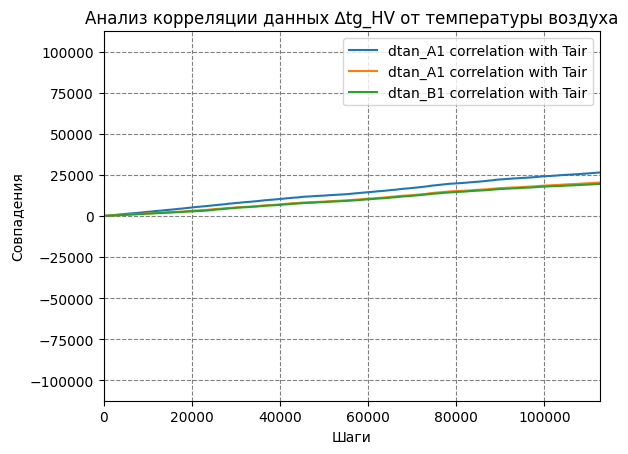

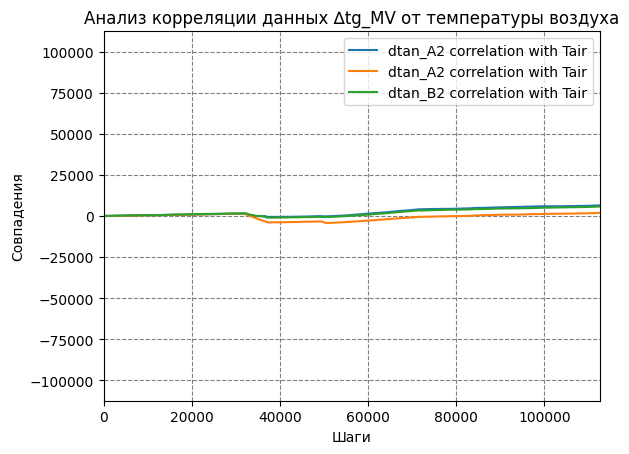

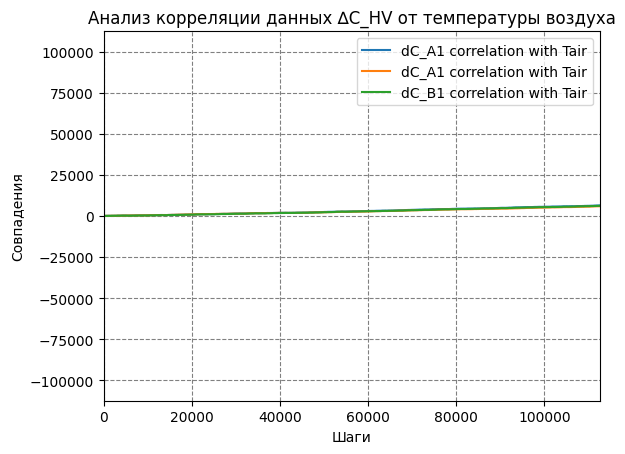

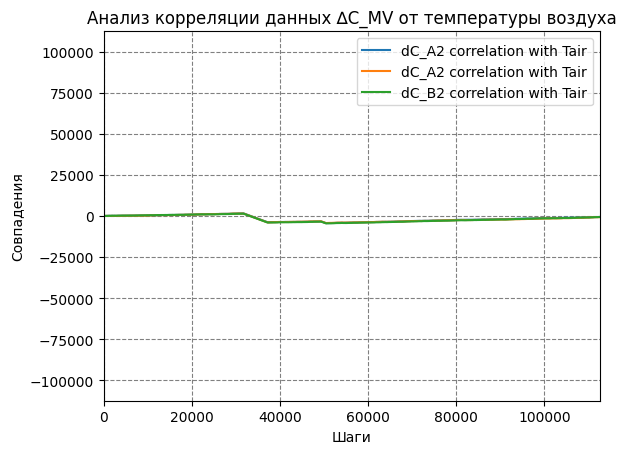

In [2]:
#  ______________________________________ CORRELATIONS AND AVERAGES ______________________________
prints.info('Анализ трендов и средних показателей')

#  Defining the most usual 'ex'amples (deviation delta and tangent delta) for further correlation analyze
trends_params = {
    '∆tg': 'Изменения значений ∆tgδ (изменение tgδ относительно начальных значений)',
    '∆C': 'Изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений)'
}

for a_key in trends_params.keys():
    for a_voltage in ['_HV', '_MV']:
        ex = a_key+a_voltage
        plots.correlation_plot(filter_list1=[ex], filter_list2=['tair'], device_type=device_type, data=data, cols=cols,
                               title=f"Анализ корреляции данных {ex} от температуры воздуха")
        plt.show()

Средние значения по ∆tg_HV: 
Среднее по модулю по dtan_A1 составило 0.019
Среднее по модулю по dtan_B1 составило 0.019
Среднее по модулю по dtan_C1 составило 0.017
Средние значения по ∆tg_MV: 
Среднее по модулю по dtan_A2 составило 6.445
Среднее по модулю по dtan_B2 составило 6.825
Среднее по модулю по dtan_C2 составило 7.764
Средние значения по ∆C_HV: 
Среднее по модулю по dC_A1 составило 0.212
Среднее по модулю по dC_B1 составило 0.234
Среднее по модулю по dC_C1 составило 0.341
Средние значения по ∆C_MV: 
Среднее по модулю по dC_A2 составило 1.948
Среднее по модулю по dC_B2 составило 1.904
Среднее по модулю по dC_C2 составило 1.576


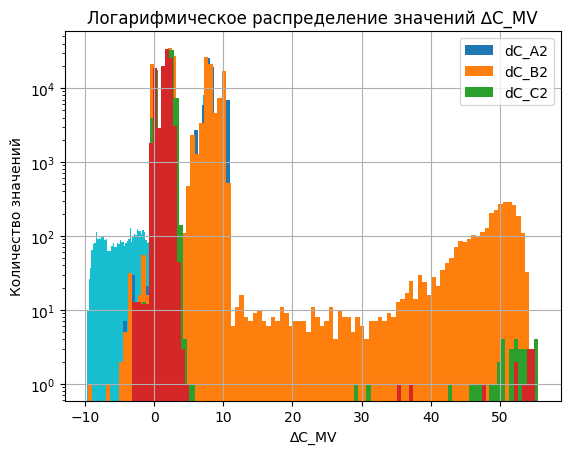

In [3]:
for a_key in trends_params.keys():
    for a_voltage in ['_HV', '_MV']:
        ex = a_key+a_voltage
        prints.average_printer(ex=ex, data=data, cols=cols, abs_parameter=True)
        plots.histogram(value=[ex], bins=99, data=data, cols=cols, title=f'Распределение значений {ex}')
        plots.histogram(value=[ex], bins=99, data=data, cols=cols, logarithm=True,
                        title=f'Логарифмическое распределение значений {ex}')

Средние значения по ∆tg_HV: 
Среднее по модулю по dtan_A1 составило 0.019
Среднее по модулю по dtan_B1 составило 0.019
Среднее по модулю по dtan_C1 составило 0.017


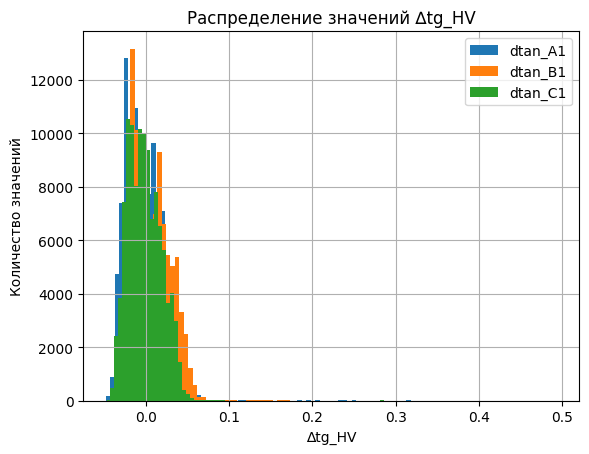

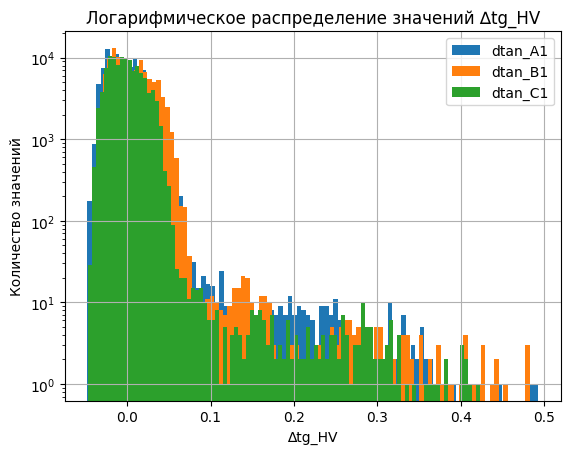

Средние значения по ∆tg_MV: 
Среднее по модулю по dtan_A2 составило 6.445
Среднее по модулю по dtan_B2 составило 6.825
Среднее по модулю по dtan_C2 составило 7.764


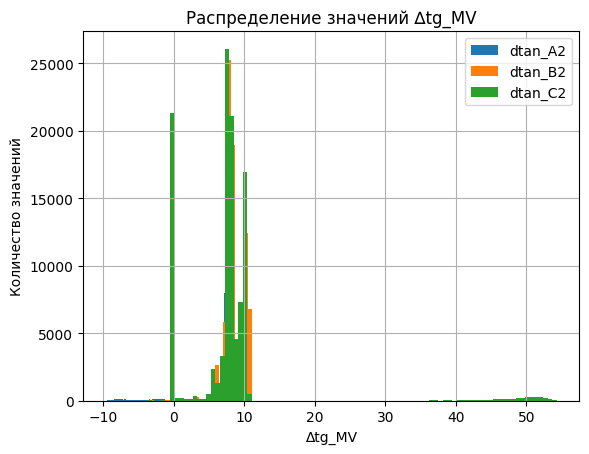

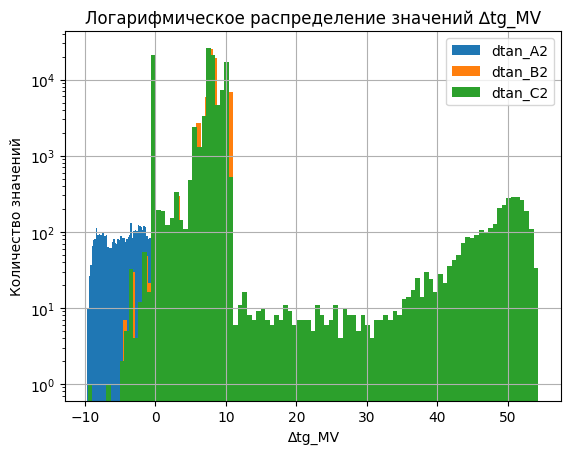

Средние значения по ∆C_HV: 
Среднее по модулю по dC_A1 составило 0.212
Среднее по модулю по dC_B1 составило 0.234
Среднее по модулю по dC_C1 составило 0.341


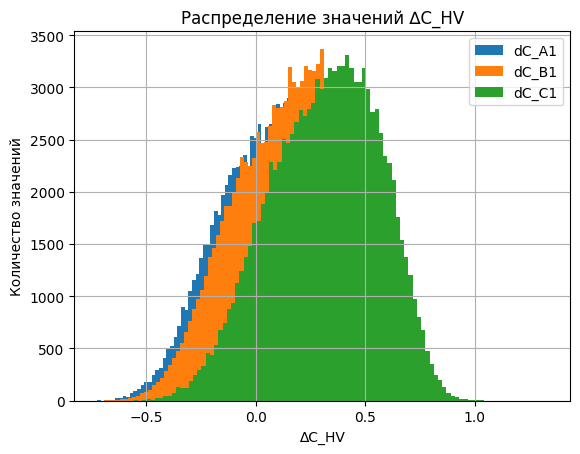

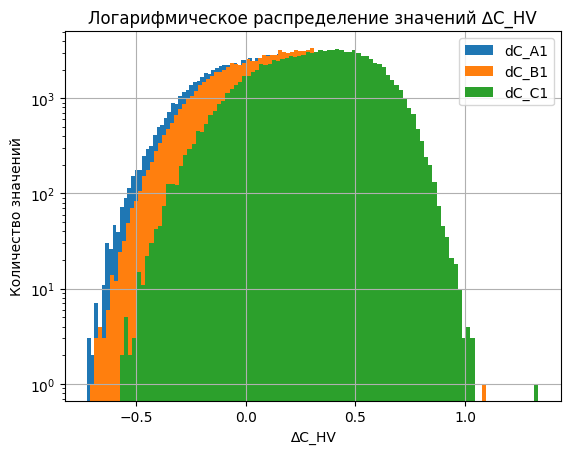

Средние значения по ∆C_MV: 
Среднее по модулю по dC_A2 составило 1.948
Среднее по модулю по dC_B2 составило 1.904
Среднее по модулю по dC_C2 составило 1.576


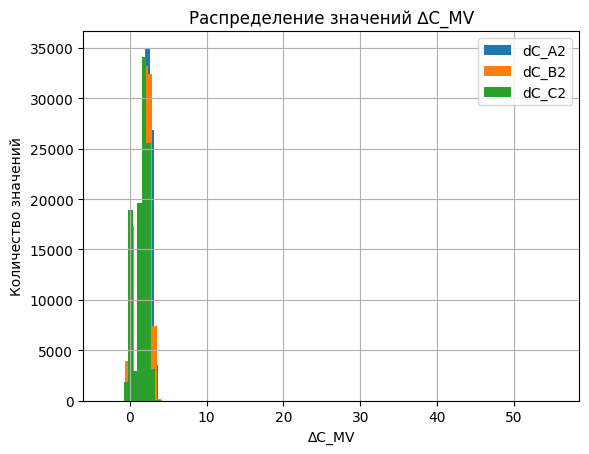

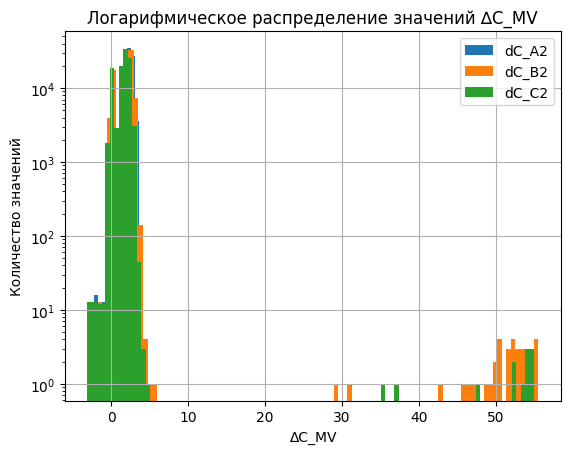

In [6]:
for a_key in trends_params.keys():
    for a_voltage in ['_HV', '_MV']:
        ex = a_key+a_voltage
        prints.average_printer(ex=ex, data=data, cols=cols, abs_parameter=True)
        plots.histogram(value=[ex], bins=99, data=data, cols=cols, title=f'Распределение значений {ex}')
        plt.show()
        plots.histogram(value=[ex], bins=99, data=data, cols=cols, logarithm=True,
                        title=f'Логарифмическое распределение значений {ex}')
        plt.show()

Средние значения по ∆tg_HV: 
Среднее по модулю по dtan_A1 составило 0.019
Среднее по модулю по dtan_B1 составило 0.019
Среднее по модулю по dtan_C1 составило 0.017


C:\Users\User\AppData\Local\Temp\ipykernel_23844\660485988.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Средние значения по ∆tg_MV: 
Среднее по модулю по dtan_A2 составило 6.445
Среднее по модулю по dtan_B2 составило 6.825
Среднее по модулю по dtan_C2 составило 7.764


C:\Users\User\AppData\Local\Temp\ipykernel_23844\660485988.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Средние значения по ∆C_HV: 
Среднее по модулю по dC_A1 составило 0.212
Среднее по модулю по dC_B1 составило 0.234
Среднее по модулю по dC_C1 составило 0.341


C:\Users\User\AppData\Local\Temp\ipykernel_23844\660485988.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Средние значения по ∆C_MV: 
Среднее по модулю по dC_A2 составило 1.948
Среднее по модулю по dC_B2 составило 1.904
Среднее по модулю по dC_C2 составило 1.576


C:\Users\User\AppData\Local\Temp\ipykernel_23844\660485988.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


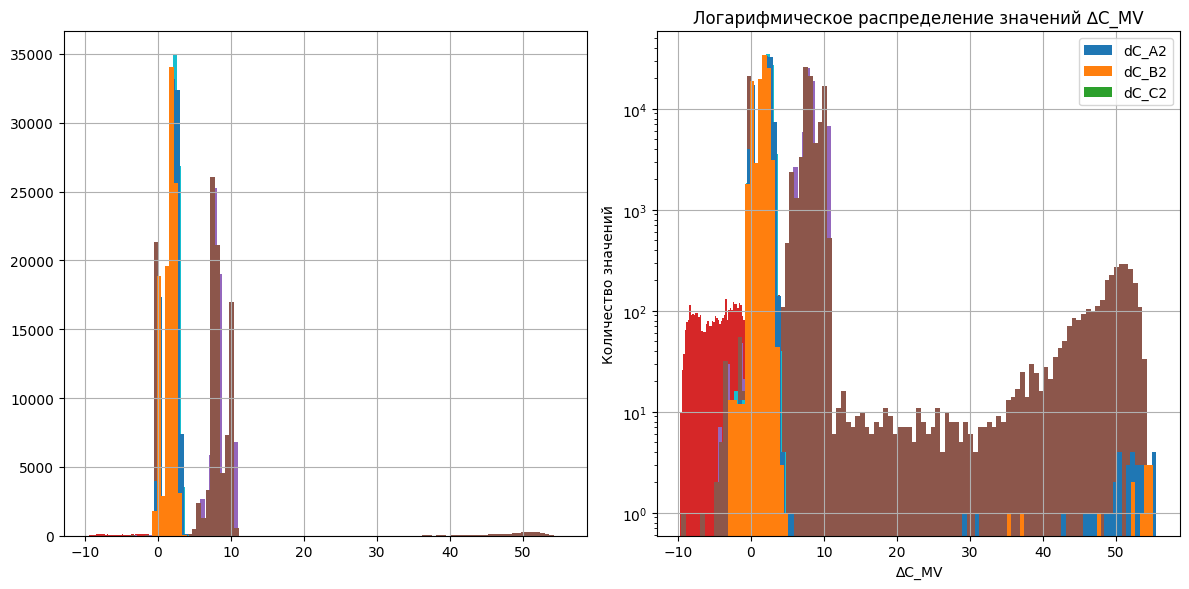

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for a_key in trends_params.keys():
    for a_voltage in ['_HV', '_MV']:
        ex = a_key+a_voltage
        prints.average_printer(ex=ex, data=data, cols=cols, abs_parameter=True)
        plots.histogram(value=[ex], ax_param=axes[0], bins=99, data=data, cols=cols, title=f'Распределение значений {ex}')
        plots.histogram(value=[ex], ax_param=axes[1], bins=99, data=data, cols=cols, logarithm=True,
                        title=f'Логарифмическое распределение значений {ex}')
        plt.tight_layout()
        fig.show()

In [76]:
pass

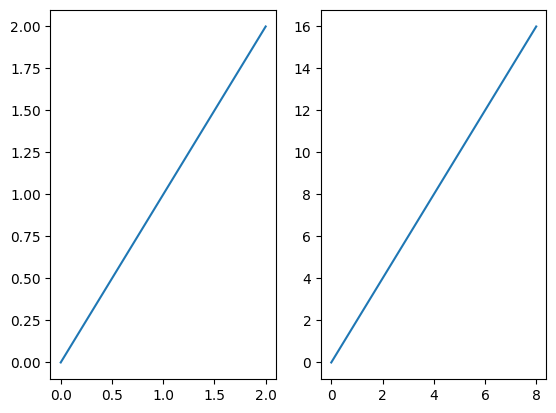

In [82]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(range(3), range(3))
axes[1].plot(range(9), [2*x for x in range(9)])